# DBSCAN
----

# import data

In [7]:
import pandas as pd

df = pd.read_csv('all_drinks.csv')
print(df.shape)
print(df.columns)
df.head()

(546, 41)
Index(['Unnamed: 0', 'strDrink', 'dateModified', 'idDrink', 'strAlcoholic',
       'strCategory', 'strDrinkThumb', 'strGlass', 'strIBA', 'strIngredient1',
       'strIngredient10', 'strIngredient11', 'strIngredient12',
       'strIngredient13', 'strIngredient14', 'strIngredient15',
       'strIngredient2', 'strIngredient3', 'strIngredient4', 'strIngredient5',
       'strIngredient6', 'strIngredient7', 'strIngredient8', 'strIngredient9',
       'strInstructions', 'strMeasure1', 'strMeasure10', 'strMeasure11',
       'strMeasure12', 'strMeasure13', 'strMeasure14', 'strMeasure15',
       'strMeasure2', 'strMeasure3', 'strMeasure4', 'strMeasure5',
       'strMeasure6', 'strMeasure7', 'strMeasure8', 'strMeasure9', 'strVideo'],
      dtype='object')


,Unnamed: 0,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


# Preprocessing Data

#### ~~include measures~~

In [2]:
# data = []

# for i in range(1,16):
#   data += list(df['strMeasure{}'.format(str(i))].unique())

# print(pd.DataFrame(data)[0].unique())

# measure를 반영해보려고 했으나 단위가 너무 다르고 to fill 이런 값들은 절대적인 값이 모호해서 어려워 보인다.

['1 oz white ' '1/2 oz ' '16 oz ' '1 shot ' '1/2 shot Bacardi ' '1/3 oz '
 '2-3 oz' '2 1/2 oz ' '\n' '2 oz dry ' '1/3 part ' '2 oz ' '1 oz '
 '1 jigger ' '1 1/2 oz ' '1 3/4 shot ' '1/3 ' '1 oz Bacardi ' '2 shots '
 '1 bottle ' '2/3 part ' '3/4 oz ' '2/3 ' '1 part ' '1/2 ' '1 1/2 shot '
 '2 cl ' '1 cl ' '2 dashes ' '3/4 cup ' '1 cup' '2 scoops ' '1/2 jigger '
 '6 oz hot ' '3 tblsp chopped' '4 cl ' '1 cup ' '4 qt ' '3 oz ' '2 cups '
 '3 parts ' '1 qt ' '5 oz blue ' 'Chilled ' '30 ml ' '1 1/2 tsp '
 '1 quart black ' '2 cl Smirnoff ' '5 oz ' '3 parts' '4.5 cl' '1 can '
 '1/3 shot ' '1 3/4 oz Bacardi ' 'Juice of 1/2 ' '10 cl cold '
 '1/2 lb frozen ' '6 oz ' '8 cubes ' '2 pint ' '1 part Bass pale '
 ' cubes\n' '3 cups ' '10 cl ' '1 tsp superfine ' '1 fifth '
 '30 ml white ' '4 cl' '1/4 ' '1 ' '2 tsp' '2 ' '3 large ' '1/2 cup '
 '1 oz' '1 1/4 oz ' '6 cups ' '125 gr' '1/2 shot ' '3 dashes '
 '10 tblsp instant ' '1 dl ' '1/2 kg chopped ' '4 cups ' '8 cups '
 '1-2 shot ' '0.75 oz ' '2 tsp ' '5 c

### exclude measure

In [8]:
# show missing value percentage
# if data is missing, return 1.
print((df.isna().sum() / len(df)) * 100)

Unnamed: 0           0.000000
strDrink             0.000000
dateModified         0.183150
idDrink              0.000000
strAlcoholic         0.183150
strCategory          0.000000
strDrinkThumb        0.000000
strGlass             0.000000
strIBA              86.996337
strIngredient1       0.000000
strIngredient10     99.450549
strIngredient11     99.450549
strIngredient12     99.816850
strIngredient13    100.000000
strIngredient14    100.000000
strIngredient15    100.000000
strIngredient2       0.000000
strIngredient3      15.567766
strIngredient4      46.153846
strIngredient5      69.597070
strIngredient6      85.714286
strIngredient7      95.421245
strIngredient8      97.252747
strIngredient9      98.901099
strInstructions      0.183150
strMeasure1          0.000000
strMeasure10        73.626374
strMeasure11        87.912088
strMeasure12        96.336996
strMeasure13        97.802198
strMeasure14        99.267399
strMeasure15        99.450549
strMeasure2          0.549451
strMeasure

In [9]:
# remove unnecessary column and missing value excepting ingredient and measure
df = df.drop(['Unnamed: 0', 'dateModified', 'strDrinkThumb', 'strVideo', 'strInstructions', 'strIBA'] + ['strMeasure'+str(i) for i in range(1, 16)],axis=1)
df.head()

,strDrink,idDrink,strAlcoholic,strCategory,strGlass,strIngredient1,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9
0,'57 Chevy with a White License Plate,14029,Alcoholic,Cocktail,Highball glass,Creme de Cacao,NaN,NaN,NaN,NaN,NaN,NaN,Vodka,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-900-FUK-MEUP,15395,Alcoholic,Shot,Old-fashioned glass,Absolut Kurant,NaN,NaN,NaN,NaN,NaN,NaN,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur,Malibu rum,Amaretto,Cranberry juice,Pineapple juice,NaN
2,110 in the shade,15423,Alcoholic,Beer,Beer Glass,Lager,NaN,NaN,NaN,NaN,NaN,NaN,Tequila,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151 Florida Bushwacker,14588,Alcoholic,Milk / Float / Shake,Beer mug,Malibu rum,NaN,NaN,NaN,NaN,NaN,NaN,Light rum,151 proof rum,Dark Creme de Cacao,Cointreau,Milk,Coconut liqueur,Vanilla ice-cream,NaN
4,155 Belmont,15346,Alcoholic,Cocktail,White wine glass,Dark rum,NaN,NaN,NaN,NaN,NaN,NaN,Light rum,Vodka,Orange juice,NaN,NaN,NaN,NaN,NaN


## Text Vectorization

### Text Preprocessing

In [10]:
df['strAlcoholic'].unique()

array(['Alcoholic', 'Non alcoholic', 'Optional alcohol', nan,
       'Non Alcoholic'], dtype=object)

In [12]:
# set 'alcoholic' instead of missingValue
df['strAlcoholic'] = df['strAlcoholic'].fillna('alcoholic')
df['strAlcoholic'] = list(map(lambda v: v.lower(),df['strAlcoholic'].replace('[ ]+', '_', regex=True)))

df['strAlcoholic'].unique()

array(['alcoholic', 'non_alcoholic', 'optional_alcohol'], dtype=object)

In [13]:
df['strCategory'].unique()

array(['Cocktail', 'Shot', 'Beer', 'Milk / Float / Shake',
       'Ordinary Drink', 'Other/Unknown', 'Homemade Liqueur',
       'Punch / Party Drink', 'Coffee / Tea', 'Soft Drink / Soda',
       'Cocoa'], dtype=object)

In [15]:
df['strCategory'] = list(map(lambda v: v.lower(),df['strCategory'].replace(' / ', '/', regex=True).replace('[ ]+', '_', regex=True)))

df['strCategory'].unique()

array(['cocktail', 'shot', 'beer', 'milk/float/shake', 'ordinary_drink',
       'other/unknown', 'homemade_liqueur', 'punch/party_drink',
       'coffee/tea', 'soft_drink/soda', 'cocoa'], dtype=object)

In [16]:
df['strGlass'].unique()

array(['Highball glass', 'Old-fashioned glass', 'Beer Glass', 'Beer mug',
       'White wine glass', 'Shot glass', 'Collins glass', 'Collins Glass',
       'Cocktail glass', 'Irish coffee cup', 'Highball Glass', 'Jar',
       'Champagne flute', 'Martini Glass', 'Margarita/Coupette glass',
       'Coffee mug', 'Pousse cafe glass', 'Punch Bowl', 'Punch bowl',
       'Beer pilsner', 'Hurricane glass', 'Whiskey sour glass',
       'Cocktail Glass', 'Margarita glass', 'Champagne Flute',
       'Pint glass', 'Mason jar', 'Shot Glass', 'Old-Fashioned glass',
       'Parfait glass', 'Coffee Mug', 'Pitcher', 'Wine Glass',
       'Cordial glass', 'Brandy snifter', 'Copper Mug'], dtype=object)

In [17]:
df['strGlass'] = list(map(lambda v: v.lower(),df['strGlass'].replace('[ ]+', '_', regex=True)))

df['strGlass'].unique()

array(['highball_glass', 'old-fashioned_glass', 'beer_glass', 'beer_mug',
       'white_wine_glass', 'shot_glass', 'collins_glass',
       'cocktail_glass', 'irish_coffee_cup', 'jar', 'champagne_flute',
       'martini_glass', 'margarita/coupette_glass', 'coffee_mug',
       'pousse_cafe_glass', 'punch_bowl', 'beer_pilsner',
       'hurricane_glass', 'whiskey_sour_glass', 'margarita_glass',
       'pint_glass', 'mason_jar', 'parfait_glass', 'pitcher',
       'wine_glass', 'cordial_glass', 'brandy_snifter', 'copper_mug'],
      dtype=object)

In [18]:
import re  

ingredients = []
for row in range(len(df)):
  row_ingredients = []
  for col in range(1, 16):
    if not pd.isna(df['strIngredient{}'.format(col)][row]):
      row_ingredients.append(re.sub('[ ]+','_',df['strIngredient{}'.format(col)][row].lower()))
  ingredients.append(row_ingredients)

ingredients = list(map(lambda ingr_list: ' '.join(ingr_list), ingredients))

# inredients string for each cocktail
print(ingredients)

['creme_de_cacao vodka', 'absolut_kurant grand_marnier chambord_raspberry_liqueur midori_melon_liqueur malibu_rum amaretto cranberry_juice pineapple_juice', 'lager tequila', 'malibu_rum light_rum 151_proof_rum dark_creme_de_cacao cointreau milk coconut_liqueur vanilla_ice-cream', 'dark_rum light_rum vodka orange_juice', 'goldschlager jägermeister rumple_minze 151_proof_rum', '151_proof_rum wild_turkey', 'jack_daniels johnnie_walker jim_beam', 'gin light_rum tequila triple_sec vodka coca-cola sweet_and_sour bitters lemon', 'peach_vodka coca-cola', 'vanilla_vodka grand_marnier orange_juice', 'blue_curacao blueberry_schnapps vodka sour_mix 7-up', 'gin 7-up lemon_juice', "kahlua bailey's_irish_cream frangelico", 'absolut_citron orange_curacao strawberry_liqueur orange_juice', 'coconut_rum amaretto orange_juice grenadine', 'light_rum ginger_beer lemon_peel', 'vodka peach_schnapps orange_juice cranberry_juice', 'light_rum añejo_rum orange_juice lemon_juice ginger_ale lemon_peel', 'amaretto s

In [19]:
# the characteristics of each cocktail with one string for tfidf
feature_str = []
for row in range(df.shape[0]):
  feature_str.append(' '.join([df['strGlass'][row],df['strCategory'][row],df['strAlcoholic'][row],ingredients[row]]))

df=pd.concat([df['strDrink'], pd.DataFrame({'feature_string':feature_str})], axis=1)

In [20]:
df.head()

,strDrink,feature_string
0,'57 Chevy with a White License Plate,highball_glass cocktail alcoholic creme_de_cac...
1,1-900-FUK-MEUP,old-fashioned_glass shot alcoholic absolut_kur...
2,110 in the shade,beer_glass beer alcoholic lager tequila
3,151 Florida Bushwacker,beer_mug milk/float/shake alcoholic malibu_rum...
4,155 Belmont,white_wine_glass cocktail alcoholic dark_rum l...


### Vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(df['feature_string'])

col=list(map(lambda x: x[0],sorted(tfidfv.vocabulary_.items(), key = lambda item: item[1])))

df_v = pd.DataFrame(data=tfidfv.transform(df['feature_string']).toarray(), columns=col)

df_v.head()

,151_proof_rum,_germain,_pepper,absinthe,absolut_citron,absolut_kurant,absolut_peppar,absolut_vodka,advocaat,agave_syrup,...,white_wine_glass,wild_turkey,wine,wine_glass,worcestershire_sauce,wormwood,yellow_chartreuse,yoghurt,yukon_jack,zima
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.403577,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.257216,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.586881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dimension Reduction

In [24]:
# PCA
from sklearn.decomposition import PCA
print("df_v shape: {}".format(df_v.shape))

pca = PCA(n_components=200)

df_v_pca = pca.fit_transform(df_v)
df_v['x'] = df_v_pca[:,0]
df_v['y'] = df_v_pca[:,1]

print("df_v_pca shape: {}".format(df_v_pca.shape))

df_v shape: (546, 363)
df_v_pca shape: (546, 200)


In [ ]:
# T-SNE

from sklearn.manifold import TSNE

print("df_v shape: {}".format(df_v.shape))

tsne = TSNE(n_components=2)
df_v_tnse = tsne.fit_transform(df_v)

print("df_v_tnse shape: {}".format(df_v_tnse.shape))


## Find HyperParameter, eps/min_sample

In [25]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.2604772268566973


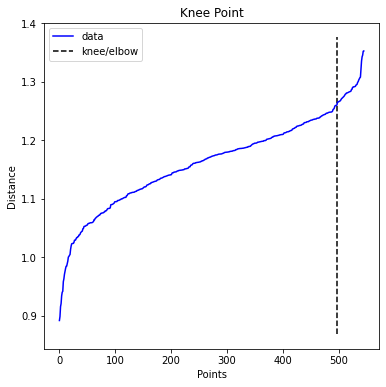

In [26]:
# for finding epsilon, use Elbow (Knee) method using sorted k-dist plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from kneed import KneeLocator

from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df_v)

distances, indices = neighbors.kneighbors(df_v)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

eps=distances[knee.knee]

In [27]:
# min_sample; ln(n)
import math
min_sample=math.log(df_v.shape[0])

In [29]:
from sklearn.cluster import DBSCAN
import math

dbscan_model = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan_model.fit(df_v_pca)

copy = pd.DataFrame(df_v_pca)

copy.loc[:,'Cluster'] = clusters.labels_
copy.Cluster.value_counts().to_frame()

# plt.scatter(df_v_tnse[:, 0], df_v_tnse[:, 1], c=clusters.labels_ )
# plt.xlabel("x")
# plt.ylabel("y")

,Cluster
0,546
